## Springfield, MO Crime Dataset: Basic Analysis

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_pickle('data/Dataframe.pkl')

In [11]:
def getReportNames(df = df):
    '''returns a list of police report types that can be analyzed'''
    return list(df.index)
getReportNames()

['Abandoned 911 Call',
 'Abandoned Vehicle',
 'Abduction',
 'Abduction - Non-Parent',
 'Abduction - Parent',
 'Accident - Non-Vehicle',
 'Administrative Duties',
 'Alarm - Law Only',
 'Animal Call',
 'Animal Call - Past',
 'Assault',
 'Assault - Past',
 'Assist An Agency',
 'Assist Person',
 'Auto Theft',
 'Auto Theft - Past',
 'Bomb Device Law',
 'Break',
 'Burglary - Commercial',
 'Burglary - Commercial - Past',
 'Burglary - Residential',
 'Burglary - Residential - Past',
 'Check Building',
 'Check Person',
 'Check Person - Weapon',
 'Check Vehicle',
 'Check Well-Being',
 'Check Well-Being - Comb',
 'Child Abuse',
 'Citizen Contact Info',
 'Civil',
 'Combined Ems Call',
 'Combined Industrial',
 'Community Event',
 'Court Appearance',
 'Deceased Person',
 'Disturbance - Domestic',
 'Disturbance - Domestic - Past',
 'Disturbance - General',
 'Disturbance - General - Past',
 'Driving Intoxicated',
 'Drugs',
 'Drugs - Past',
 'Drunk Person',
 'Elder Abuse',
 'Emergency Message Relay',
 '

In [12]:
def incident_total(incident, df = df, Byear = 2004, Eyear = 2016):
    '''returns the total number of reports between years'''
    return df.ix[incident,Byear:Eyear].sum()
#report_total('Suicide')
#df.ix['Suicide'].sum()
incident_total('Suicide',Eyear = 2005)

145

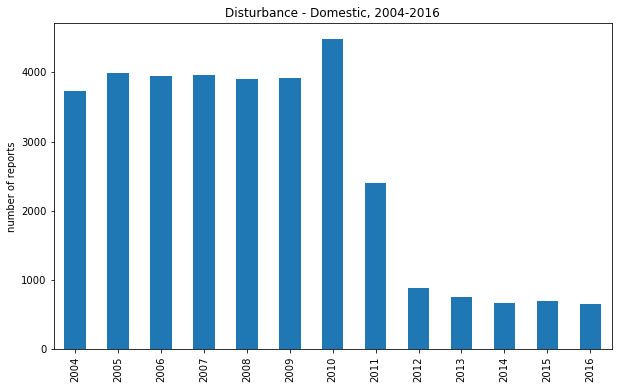

In [32]:
def bar_plot_by_year(name):
    '''returns the total number of reports between years as a bar plot'''
    return pd.Series((df[year].ix[name].sum() for year in range(2004,2017)), 
                     index = [[i for i in range(2004,2017)]]).plot.bar(use_index = True, 
                                                                       title = name + ', 2004-2016',
                                                                      figsize = (10,6)).set_ylabel("number of reports")
bar_plot_by_year('Disturbance - Domestic')

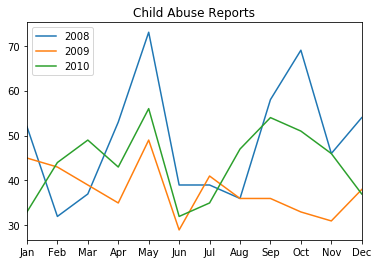

In [34]:
def plot_year(name,year):
    '''plot year as a line plot'''
    return df[year].ix[name].plot(legend = True, label = year, xticks = range(0,12),title = name + ' Reports')

for year in range(2008,2011):
    plot_year('Child Abuse', year)

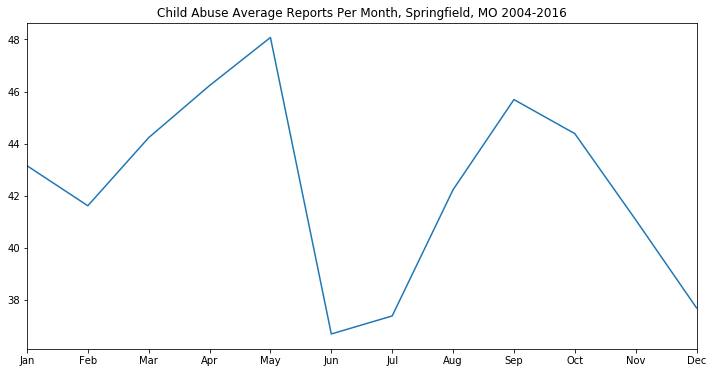

In [63]:
def average_by_month(incident, month):
    return df.ix[incident][:,month]

def plot_monthly_averages(incident):
    '''returns a bar plot of monthly averages for the requested report type'''
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    result =[]
    plt.figure()
    for month in months:
        result.append(average_by_month(incident,month).mean())
    pd.Series(result, index = months).plot(xticks = range(0,12),
                                           title = incident + ' Average Reports Per Month, Springfield, MO 2004-2016',
                                           figsize=(12,6))
def plot_yearly_averages(incident):
    '''plots the average number of reports per month in each year'''
    result = []
    for year in range(2004,2017):
        result.append(df[year].ix[incident].mean())
    pd.Series(result,index = [i for i in range(2004,2017)]).plot(legend = True, label = incident,xticks = range(2004,2017),
                                                                 title= 'Average reports per month by year',
                                                                figsize = (12,6))
    
plot_monthly_averages('Child Abuse')

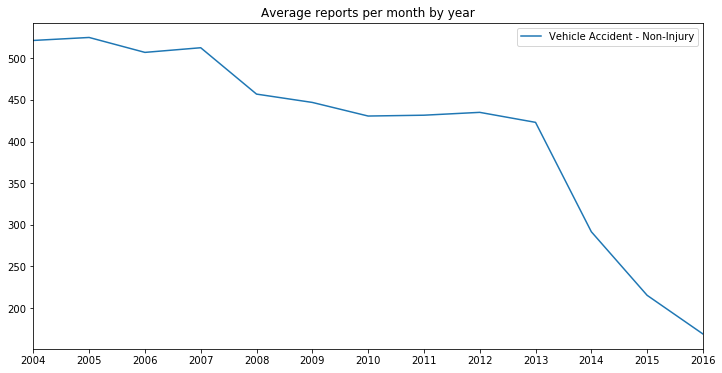

In [66]:
plot_yearly_averages('Vehicle Accident - Non-Injury')
#plot_yearly_averages('Vehicle Accident - Past')
#plot_yearly_averages('Disturbance - Domestic - Past')
#plot_yearly_averages('Disturbance - Domestic')
#plot_yearly_averages('Disturbance - General - Past')
#plot_yearly_averages('Disturbance - General')

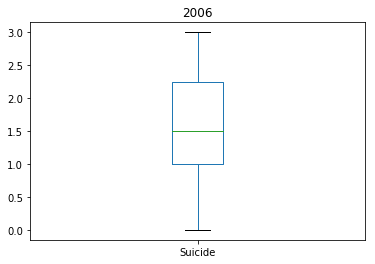

In [43]:
#why are the box plots all on the same line?

#for i in range(2005,2009):
#    df[i].ix['Suicide'].plot.box(xticks = [1,2,3,4])
#this one on the sameline too... with circles???    
#df.ix['Suicide',2005].plot.box()
df.ix['Suicide',2006].plot.box(title = '2006')

In [74]:
df[2012].ix['Rape'].sum()

KeyError: 'Rape'